# Basic Understanding of API

In [2]:
# Importing library

'''
package : requests
description : most common library for making requests and working with APIs
'''

import requests
import json
import pandas as pd

In [ ]:
# Basic API Request 

'''
Types of requests :-
1. GET : is used to request data from a specified resource, never use with sensitive data and never use to modify the data.
2. POST : is used to send data to a server to create/update a resource, do not remain in the browser history, no restrictions on data length. 
'''

response = requests.get("https://api.open-notify.org/this-api-doesnt-exist") 
# The get() function returns a response object. 

In [ ]:
# Can use response.status_code attribute to receive the status code for our request:
print(response.status_code)

### API Status Codes

200: Everything went okay, and the result has been returned (if any).

301: The server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an endpoint name is changed.

400: The server thinks you made a bad request. This can happen when you don’t send along the right data, among other things.

401: The server thinks you’re not authenticated. Many APIs require login ccredentials, so this happens when you don’t send the right credentials to access an API.

403: The resource you’re trying to access is forbidden: you don’t have the right permissions to see it.

404: The resource you tried to access wasn’t found on the server.

503: The server is not ready to handle the request.

#### Note :- 
            1. 2 series = Response related to success.
            2. 4/5 series = Response related to error. 

### Understanding API

In [3]:
'''
- Always go through the API documentation.
- Two types :-
    - With Authentication 
    - Without Authentication.
- Here we atre using Open Notify API = gives access to data about the international space station.
- Each API is called endpoints
'''

response = requests.get("http://api.open-notify.org/iss-now.json")
print(response.status_code)

200


In [4]:
# Checking metadata of response
print(response.json())

{'message': 'success', 'iss_position': {'latitude': '-34.7172', 'longitude': '-167.4119'}, 'timestamp': 1622806351}


### Exploring JSON data in python

In [5]:
'''
JSON is the primary format in which data is passed back and forth to APIs, and most API servers will send their responses in JSON format.
Python has great JSON support with the json package. 
Main functions of JSON package : -
    1. json.dumps() — Takes in a Python object, and converts (dumps) it to a string.
    2. json.loads() — Takes a JSON string, and converts (loads) it to a Python object.
'''

dictionary = json.dumps(response.json(), sort_keys = True, indent = 4)
print(dictionary)

{
    "iss_position": {
        "latitude": "-34.7172",
        "longitude": "-167.4119"
    },
    "message": "success",
    "timestamp": 1622806351
}


In [6]:
# Playing with JSON data 

'''
We are interested in knowing latitude & longitude
'''
json_response = response.json()

latitude = json_response['iss_position']['latitude']
longitude = json_response['iss_position']['longitude']

print('Longitude: ', longitude)
print('Latitude: ', latitude)

Longitude:  -167.4119
Latitude:  -34.7172


In [7]:
'''
Applying above tasks in function
'''

def jprint(obj):
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

jprint(response.json())


{
    "iss_position": {
        "latitude": "-34.7172",
        "longitude": "-167.4119"
    },
    "message": "success",
    "timestamp": 1622806351
}


### Using an API with Query Parameters

In [8]:

parameters = {
    "latitude": "-36.8657",
    "longitude": "-21.2536"
}
response = requests.get("http://api.open-notify.org/iss-now.json", params=parameters)

jprint(response.json())

{
    "iss_position": {
        "latitude": "-34.9074",
        "longitude": "-167.1633"
    },
    "message": "success",
    "timestamp": 1622806355
}


## Real Life Usecase of API

### Finding Counts of covid cases on real time basis using API (Real time application : https://mmediagroup.fr/covid-19)

In [9]:
parameters = {"country" : "India"}
response = requests.get("https://covid-api.mmediagroup.fr/v1/cases", params=parameters)

In [10]:
jprint(response.json())

{
    "All": {
        "abbreviation": "IN",
        "capital_city": "New Delhi",
        "confirmed": 28574350,
        "continent": "Asia",
        "country": "India",
        "deaths": 340702,
        "elevation_in_meters": 160,
        "iso": 356,
        "life_expectancy": "62.5",
        "location": "Southern and Central Asia",
        "population": 1339180127,
        "recovered": 26597655,
        "sq_km_area": 3287263
    },
    "Andaman and Nicobar Islands": {
        "confirmed": 7070,
        "deaths": 119,
        "lat": "11.225999",
        "long": "92.968178",
        "recovered": 6820,
        "updated": "2021/06/04 10:24:18+00"
    },
    "Andhra Pradesh": {
        "confirmed": 1728577,
        "deaths": 11213,
        "lat": "15.9129",
        "long": "79.74",
        "recovered": 1578452,
        "updated": "2021/06/04 10:24:18+00"
    },
    "Arunachal Pradesh": {
        "confirmed": 28382,
        "deaths": 119,
        "lat": "27.768456",
        "long": "96.384

In [11]:
# Extracting all keys (states) from the JSON
list(response.json().keys())

['All',
 'Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Unknown',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [12]:
# Finding the confirmed and deaths in Maharashtra state

json_response = response.json()

confirmed_cases_mah = json_response['Maharashtra']['confirmed']
deaths_mah = json_response['Maharashtra']['deaths']

print("Confirmed Covid cases in Maharashtra : ", confirmed_cases_mah)
print("Total Deaths in Maharashtra : ", deaths_mah)

Confirmed Covid cases in Maharashtra :  5791413
Total Deaths in Maharashtra :  97394


#### Many Public APIs are avaialble to explore: https://github.com/public-apis/public-apis

# Intermediate Understanding of API

#### Main Goal :-
    1. How to authenticate yourself with an API key.
    2. How to use rate limiting and other techniques to work within the guidelines of an API.
    3. How to use pagination to work with large responses.

**In this tutorial we are working with [Last.fm](https://www.last.fm/api/intro) API. We have to follow guildelines mentioned by Last.fm**
    
    Guidelines :-
        1. Please use an identifiable User-Agent header on all requests. This helps our logging and reduces the risk of you getting banned.
        (When you make a request to the last.fm API, you can identify yourself using headers. Last.fm wants us to specify a user-agent in the header so they know who we are. We’ll learn how to do that when we make our first request in a moment.)
        
        2. Be reasonable in your usage of the API and ensure you don't make an excessive number of calls as that can impact the reliability of the service to you and other users.
        (Use common sense when deciding how many calls to make. For example, if you’re making a web application, try not to hit the API on page load. Your account may be suspended if your application is continuously making several calls per second.)

## Authentication

***Authenticating with API Keys***

**APIs require a person to authenticate themself, so that it knows that he has permission to use API. Authentication basically is like password for using that API.**

Process of using an API :-

    1. Create an account with the provider of the API.
    2. Request a API, which will be a long string like 1234tyui09876er56
    3. Keep your API safe somewhere. Don’t disclose it. 
    4. While sending a request, we provide API key to authenticate ourself.

Application name :	API_Tutorial

API key	: 4e15fb011fcaca9e015b31b2bbc6d659

Shared secret	: 0b3579f3b62e7ae3b1fd42e3b8f559e1

Registered to	: Music_Insect

1. Here we will use [chart.getTopArtists](https://www.last.fm/api/show/chart.getTopArtists)
    - It looks like there is only one real endpoint, and each “endpoint” is actually specified by using the method parameter.
    - The API can return results in multiple formats – we’ll specify JSON
    - JSON: /2.0/?method=chart.gettopartists&api_key=YOUR_API_KEY&format=json

2. To provide a user-agent header to identify ourselves when we make a request, we specify headers using the headers parameter.

In [13]:
API_Key = 'XXXXXXXXXXXXXXXX'
USER_AGENT = 'Music_Insect'

In [14]:
import requests

headers = {
    'user-agent' : 'Music_Insect'
    }

payload = {
    'api_key' : API_Key, 
    'method' : 'chart.gettopartists', 
    'format' : 'json'
}

r = requests.get('http://ws.audioscrobbler.com/2.0/', headers=headers, params=payload)

r.status_code

200

In [15]:
# Encapsulating all the above in a single function 

def lastfm_get(payload):
    headers = {'user-agent' : USER_AGENT}
    url = 'http://ws.audioscrobbler.com/2.0/'

    payload['api_key'] = API_Key
    payload['format'] = 'json'

    response = requests.get(url, headers=headers, params=payload)
    return response

In [16]:
r = lastfm_get({ 'method' : 'chart.gettopartists'})
r.status_code

200

In [ ]:
jprint(r.json())

In [18]:
# Exploring @attr key

'''
There are approx 4 million artists in the response, however, on a single page they have displayed only 50 artists.
This technique of spreading the results over multiple pages is called PAGINATION.
'''

jprint(r.json()['artists']['@attr'])

{
    "page": "1",
    "perPage": "50",
    "total": "3919078",
    "totalPages": "78382"
}


## Exploring Pagination Functionality 

- When we want to prepare a dataset, we have to make a request to API multiple times, as in a single request it send limited data, then we append this data.
- Pagination can be controlled by the following parameters :-

    1. limit: The number of results to fetch per page (defaults to 50).
    2. page: Which page of the results we want to fetch.

- Use a while loop and iterate over pages until the page number is equal to the last page number.
- Use the limit parameter to fetch more results in each page — we’ll fetch 500 results per page so we only need to make ~6,000 calls instead of ~60,000.

### Rate Limiting

Rate limiting can be achieved in two ways :-

1. Rate limiting is using code to limit the number of times per second that we hit a particular API. Rate limiting will make your code slower, but it’s better than getting banned from using an API altogether.

2. Using a local database to cache the results of any API call, so that if we make the same call twice, the second time it reads it from the local cache. 


**Benefits of using cache**

1. You don’t make extra API calls that you don’t need to.
2. You don’t need to wait the extra time to rate limit when reading the repeated calls from the cache.






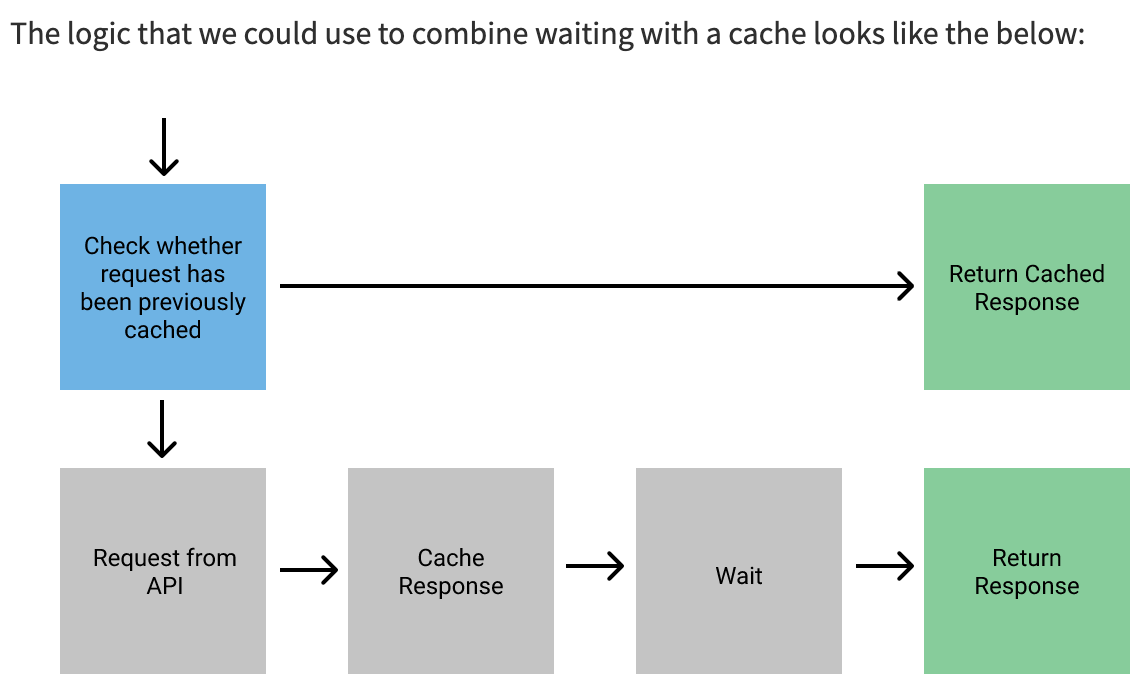

In [20]:
import requests_cache

requests_cache.install_cache()

In [21]:
'''
Its so boring to wautr for couple of minutes without knowing what is going on with the code. So, we will use
the IPython display trick to clear the output after each run so things look neater in our notebook.
'''

import time
from IPython.core.display import clear_output

start_time = time.time()
responses = []

page = 1
total_pages = 99999 # this is just a dummy number so the loop starts

# while page <= total_pages:
while page <= 5250:
    payload = {
        'method': 'chart.gettopartists',
        'limit': 500,
        'page': page
    }

    # print some output so we can see the status
    print("Requesting page {}/{}".format(page, total_pages))
    # clear the output to make things neater
    clear_output(wait = True)

    # make the API call
    response = lastfm_get(payload)

    # if we get an error, print the response and halt the loop
    if response.status_code != 200:
        print(response.text)
        break

    # extract pagination info
    page = int(response.json()['artists']['@attr']['page'])
    total_pages = int(response.json()['artists']['@attr']['totalPages'])

    # append response
    responses.append(response)

    # if it's not a cached result, sleep
    if not getattr(response, 'from_cache', False):
        time.sleep(0.25)

    # increment the page number
    page += 1

print(time.time()-start_time)

39.55612802505493


## Processing the Data

In [24]:
import pandas as pd

r0 = responses[0]
r0_json = r0.json()
r0_artists = r0_json['artists']['artist']
r0_df = pd.DataFrame(r0_artists)
r0_df.head()

,name,playcount,listeners,mbid,url,streamable,image
0,The Weeknd,179346588,2006559,c8b03190-306c-4120-bb0b-6f2ebfc06ea9,https://www.last.fm/music/The+Weeknd,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
1,Olivia Rodrigo,29852690,529936,,https://www.last.fm/music/Olivia+Rodrigo,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
2,Billie Eilish,98962944,1206600,,https://www.last.fm/music/Billie+Eilish,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
3,Kanye West,364538699,4936218,164f0d73-1234-4e2c-8743-d77bf2191051,https://www.last.fm/music/Kanye+West,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
4,Dua Lipa,96012217,1145614,,https://www.last.fm/music/Dua+Lipa,0,[{'#text': 'https://lastfm.freetls.fastly.net/...


### Doing above task in a single line

**Lists of list. ----> Lists of DF. ----> Concat DFs**

In [25]:
frame = [pd.DataFrame(r.json()['artists']['artist']) for r in responses]
artists = pd.concat(frame)
artists.head()

,name,playcount,listeners,mbid,url,streamable,image
0,The Weeknd,179346588,2006559,c8b03190-306c-4120-bb0b-6f2ebfc06ea9,https://www.last.fm/music/The+Weeknd,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
1,Olivia Rodrigo,29852690,529936,,https://www.last.fm/music/Olivia+Rodrigo,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
2,Billie Eilish,98962944,1206600,,https://www.last.fm/music/Billie+Eilish,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
3,Kanye West,364538699,4936218,164f0d73-1234-4e2c-8743-d77bf2191051,https://www.last.fm/music/Kanye+West,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
4,Dua Lipa,96012217,1145614,,https://www.last.fm/music/Dua+Lipa,0,[{'#text': 'https://lastfm.freetls.fastly.net/...


In [26]:
# droping image column since for this tutorial its of no use

artists = artists.drop(['image'], axis=1)
print(artists.shape)
artists.head()

(10000, 6)


,name,playcount,listeners,mbid,url,streamable
0,The Weeknd,179346588,2006559,c8b03190-306c-4120-bb0b-6f2ebfc06ea9,https://www.last.fm/music/The+Weeknd,0
1,Olivia Rodrigo,29852690,529936,,https://www.last.fm/music/Olivia+Rodrigo,0
2,Billie Eilish,98962944,1206600,,https://www.last.fm/music/Billie+Eilish,0
3,Kanye West,364538699,4936218,164f0d73-1234-4e2c-8743-d77bf2191051,https://www.last.fm/music/Kanye+West,0
4,Dua Lipa,96012217,1145614,,https://www.last.fm/music/Dua+Lipa,0


In [27]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        10000 non-null  object
 1   playcount   10000 non-null  object
 2   listeners   10000 non-null  object
 3   mbid        10000 non-null  object
 4   url         10000 non-null  object
 5   streamable  10000 non-null  object
dtypes: object(6)
memory usage: 546.9+ KB


In [28]:
artists.describe()

,name,playcount,listeners,mbid,url,streamable
count,10000,10000,10000,10000,10000,10000
unique,10000,9993,9869,6356,10000,1
top,Erica Banks,878091,39793,,https://www.last.fm/music/James+Smith,0
freq,1,2,2,3623,1,10000


We were expecting approx 3M artists but have received only 10000, so something went wrong.


In [31]:
artist_count = [len(r.json()['artists']['artist']) for r in responses]
pd.Series(artist_count).value_counts()

0      5230
500      20
dtype: int64

So, from above it is explained that only 20 of our requests give response. Let’s look at the first fifty in order and see if there’s a pattern.

In [33]:
print(artist_count[:50])

[500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


It looks like after the first twenty responses, this API doesn’t return any data — an undocumented limitation.

In [35]:
artists = artists.drop_duplicates().reset_index(drop=True)
artists.describe()

,name,playcount,listeners,mbid,url,streamable
count,10000,10000,10000,10000,10000,10000
unique,10000,9993,9869,6356,10000,1
top,Erica Banks,878091,39793,,https://www.last.fm/music/James+Smith,0
freq,1,2,2,3623,1,10000


## Augmenting the Data Using a Second Last.fm API Endpoint

In [36]:
# endpoint : artist.getTopTags

r = lastfm_get({
    'method': 'artist.getTopTags',
    'artist':  'Lana Del Rey'
})

jprint(r.json())

{
    "toptags": {
        "@attr": {
            "artist": "Lana Del Rey"
        },
        "tag": [
            {
                "count": 100,
                "name": "female vocalists",
                "url": "https://www.last.fm/tag/female+vocalists"
            },
            {
                "count": 94,
                "name": "indie",
                "url": "https://www.last.fm/tag/indie"
            },
            {
                "count": 89,
                "name": "indie pop",
                "url": "https://www.last.fm/tag/indie+pop"
            },
            {
                "count": 80,
                "name": "pop",
                "url": "https://www.last.fm/tag/pop"
            },
            {
                "count": 67,
                "name": "alternative",
                "url": "https://www.last.fm/tag/alternative"
            },
            {
                "count": 14,
                "name": "dream pop",
                "url": "https://www.last.fm/tag/

In [37]:
# Let's explore only tag names. Fetching only top 3 tags.


tags = [t['name'] for t in r.json()['toptags']['tag'][:3]]
tags

['female vocalists', 'indie', 'indie pop']

In [38]:
# converting it into a string
', '.join(tags)

'female vocalists, indie, indie pop'

In [39]:
'''
Encapsulating above in a single function, which will extract top tags of a given artist.
'''

def lookup_tags(artist):
    response = lastfm_get({
        'method': 'artist.getTopTags',
        'artist':  artist
    })

    # if there's an error, just return nothing
    if response.status_code != 200:
        return None

    # extract the top three tags and turn them into a string
    tags = [t['name'] for t in response.json()['toptags']['tag'][:3]]
    tags_str = ', '.join(tags)

    # rate limiting
    if not getattr(response, 'from_cache', False):
        time.sleep(0.25)
    return tags_str

In [41]:
lookup_tags("Billie Eilish")

'pop, indie pop, female vocalists'

In [42]:
# Applying the above function to complete dataframe. Using progress_apply instead of apply to check the process.

from tqdm import tqdm
tqdm.pandas()

artists['tags'] = artists['name'].progress_apply(lookup_tags)

100%|██████████| 10000/10000 [1:36:27<00:00,  1.73it/s]


In [43]:
artists.head()

,name,playcount,listeners,mbid,url,streamable,tags
0,The Weeknd,179346588,2006559,c8b03190-306c-4120-bb0b-6f2ebfc06ea9,https://www.last.fm/music/The+Weeknd,0,"rnb, electronic, dubstep"
1,Olivia Rodrigo,29852690,529936,,https://www.last.fm/music/Olivia+Rodrigo,0,"pop, Disney, indie pop"
2,Billie Eilish,98962944,1206600,,https://www.last.fm/music/Billie+Eilish,0,"pop, indie pop, female vocalists"
3,Kanye West,364538699,4936218,164f0d73-1234-4e2c-8743-d77bf2191051,https://www.last.fm/music/Kanye+West,0,"Hip-Hop, rap, hip hop"
4,Dua Lipa,96012217,1145614,,https://www.last.fm/music/Dua+Lipa,0,"pop, synthpop, electropop"


In [44]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        10000 non-null  object
 1   playcount   10000 non-null  object
 2   listeners   10000 non-null  object
 3   mbid        10000 non-null  object
 4   url         10000 non-null  object
 5   streamable  10000 non-null  object
 6   tags        10000 non-null  object
dtypes: object(7)
memory usage: 547.0+ KB


In [45]:
#  converting the listeners and playcount columns to numeric.

artists[["playcount", "listeners"]] = artists[["playcount", "listeners"]].astype(int)

In [46]:
# Sorting by listeners
artists = artists.sort_values("listeners", ascending=False)
artists.head(10)

,name,playcount,listeners,mbid,url,streamable,tags
13,Coldplay,394063821,5857957,cc197bad-dc9c-440d-a5b5-d52ba2e14234,https://www.last.fm/music/Coldplay,0,"rock, alternative, britpop"
25,Radiohead,564014980,5122652,a74b1b7f-71a5-4011-9441-d0b5e4122711,https://www.last.fm/music/Radiohead,0,"alternative, alternative rock, rock"
9,Rihanna,237266756,5096436,db36a76f-4cdf-43ac-8cd0-5e48092d2bae,https://www.last.fm/music/Rihanna,0,"pop, rnb, female vocalists"
31,Eminem,244048742,5001478,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,https://www.last.fm/music/Eminem,0,"rap, Hip-Hop, Eminem"
54,Red Hot Chili Peppers,322646597,4958221,8bfac288-ccc5-448d-9573-c33ea2aa5c30,https://www.last.fm/music/Red+Hot+Chili+Peppers,0,"rock, alternative rock, alternative"
3,Kanye West,364538699,4936218,164f0d73-1234-4e2c-8743-d77bf2191051,https://www.last.fm/music/Kanye+West,0,"Hip-Hop, rap, hip hop"
62,The Killers,231973914,4790302,95e1ead9-4d31-4808-a7ac-32c3614c116b,https://www.last.fm/music/The+Killers,0,"indie, rock, indie rock"
41,Nirvana,253732651,4675382,9282c8b4-ca0b-4c6b-b7e3-4f7762dfc4d6,https://www.last.fm/music/Nirvana,0,"Grunge, rock, alternative"
19,Queen,226654843,4503339,420ca290-76c5-41af-999e-564d7c71f1a7,https://www.last.fm/music/Queen,0,"classic rock, rock, 80s"
14,Lady Gaga,384129546,4360555,650e7db6-b795-4eb5-a702-5ea2fc46c848,https://www.last.fm/music/Lady+Gaga,0,"pop, dance, electronic"
